<a href="https://colab.research.google.com/github/Ajay-Kandagatla/DATASCIENCE/blob/main/Cement_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imputing Data Manipulation Library

import pandas as pd
import numpy as np

# Importing Data Visualization Library

import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarning Library

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data Using Pandas Function

df = pd.read_csv('Concrete_Data.csv')

# Shuffle 100% Dataset

df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
26,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
742,480.0,0.0,0.0,192.0,0.0,936.0,721.0,90,54.28
682,183.9,122.6,0.0,203.5,0.0,959.2,800.0,28,24.05
824,302.0,0.0,0.0,203.0,0.0,974.0,817.0,28,21.75
874,313.0,0.0,113.0,178.0,8.0,1002.0,689.0,28,36.80
...,...,...,...,...,...,...,...,...,...
677,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.68
732,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,7,9.01
341,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,28,47.40
182,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30


In [3]:
# Checking Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
print(df.isnull().sum() / len(df) *100)

Cement (component 1)(kg in a m^3 mixture)                0.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.0
Fly Ash (component 3)(kg in a m^3 mixture)               0.0
Water  (component 4)(kg in a m^3 mixture)                0.0
Superplasticizer (component 5)(kg in a m^3 mixture)      0.0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.0
Age (day)                                                0.0
Concrete compressive strength(MPa, megapascals)          0.0
dtype: float64


In [8]:
# Split the dataset into Categorical and Numerical cols...
numerical_col = df.select_dtypes(exclude = 'object')
numerical_col

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
categorical_col = df.select_dtypes(include = 'object')
categorical_col

""
0
1
2
3
4
...
1025
1026
1027
1028


In [10]:
# Exploratory Data Analysis:
# 1. Univariate Analysis

'''
Step1: Create a Blank List: stats[]
Step2: Create Dictionary using OrderedDict
Step3: Append list with Dictionary
Step4: Convert stats[] i.e List info DataFrame
'''
def univariate_stats():
from collections import OrderedDict
stats = []

for i in df.column:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Count':df[i].count(),
        'Miximum':df[i].max(),
        'Minimum':df[i].min(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Kurtosis':df[i].kurtosis(),
        'Skewness':df[i].skew()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Count,Miximum,Minimum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness
0,Cement (component 1)(kg in a m^3 mixture),1030,540.0,102.00,281.167864,272.900,192.375,350.000,157.625,104.506364,-0.520652,0.509481
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,1030,359.4,0.00,73.895825,22.000,0.000,142.950,142.950,86.279342,-0.508175,0.800717
2,Fly Ash (component 3)(kg in a m^3 mixture),1030,200.1,0.00,54.188350,0.000,0.000,118.300,118.300,63.997004,-1.328746,0.537354
3,Water (component 4)(kg in a m^3 mixture),1030,247.0,121.80,181.567282,185.000,164.900,192.000,27.100,21.354219,0.122082,0.074628
4,Superplasticizer (component 5)(kg in a m^3 mix...,1030,32.2,0.00,6.204660,6.400,0.000,10.200,10.200,5.973841,1.411269,0.907203
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1030,1145.0,801.00,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.599016,-0.040220
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1030,992.6,594.00,773.580485,779.500,730.950,824.000,93.050,80.175980,-0.102177,-0.253010
7,Age (day),1030,365.0,1.00,45.662136,28.000,7.000,56.000,49.000,63.169912,12.168989,3.269177
8,"Concrete compressive strength(MPa, megapascals)",1030,82.6,2.33,35.817961,34.445,23.710,46.135,22.425,16.705742,-0.313725,0.416977


In [16]:
# Step 1: Split the data into X and y
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1)

y = df['Concrete compressive strength(MPa, megapascals) ']

In [17]:
# Step 2: Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [18]:
# Step 3: Use Scaling Technique
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Model Building
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

y_pred_LR = LR.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5414805238935219

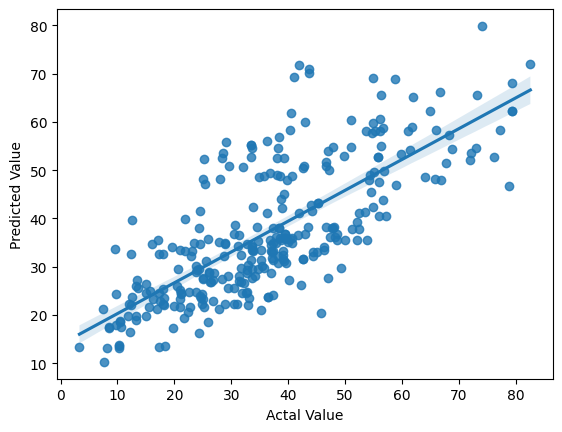

In [22]:
sns.regplot(x = y_test, y = y_pred_LR)
plt.xlabel('Actal Value')
plt.ylabel('Predicted Value')
plt.show()

In [23]:
LR.intercept_

np.float64(-1.0401548774709397)

In [24]:
LR.coef_

array([ 53.43067724,  37.82424604,  17.46783314, -19.37861572,
        10.68273349,   4.19372379,   5.72512305,  42.06092365])

In [25]:
X.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')